In [1]:
import re
import warnings
warnings.filterwarnings("ignore")


import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
import matplotlib.transforms as transforms

import seaborn as sns

from scipy.ndimage.filters import gaussian_filter1d
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA #мультфакторная анова
from statsmodels.formula.api import ols #линейные модели 

from scipy.stats import f_oneway as ANOVA

import scipy

# АГРОХИМИЯ

In [2]:
def aov_for_nominal(df, agrochem_property):
    """
    input - dataframe by agrochemical_proprerty
    output - resul of MANOVA
    """
    dispers = df.copy()
    agrochem_property_ = re.sub(r'[\(),.%№ /-]', '' , agrochem_property)
    dispers.columns = dispers.columns.str.replace(r'[\(),.%№ /-]', '' )
    reg = ols('{} ~ Типобработки  *  Рельеф'.format(agrochem_property_) ,  data=dispers).fit()
    aov = sm.stats.anova_lm(reg)
    aov = aov[["PR(>F)"]]
    aov.columns = ['p-value']
    aov = aov.iloc[:4,:]
    aov['p-value'] = round(aov['p-value'] , 3)
    return aov

In [3]:
agrochemistry_total = pd.read_csv('ready_data/агрохимия_для_статьи.csv')
agrochemistry_total['GPS №'] = agrochemistry_total['GPS №'].astype(int)

agrochemistry_total = agrochemistry_total[agrochemistry_total['GPS №'].isin([585, 528, 584, 527])]

agrochemistry_total['Рельеф'] = 'рельеф'

agrochemistry_total['Рельеф'][agrochemistry_total['GPS №'].isin([585, 528])] = 'Плакор'
agrochemistry_total['Рельеф'][agrochemistry_total['GPS №'].isin([584, 527])] = 'Тальвег'

agrochemistry_total = agrochemistry_total[agrochemistry_total['Глубина'].isin(["0-10", "10-20"])]

agrochemistry_total['Гумус, %'] = agrochemistry_total['Органический углерод, %'] * 1.724

agrochem_columns = ['Год', 
                    'GPS №',
                    'Тип обработки',
                    "Рельеф", 
                    "рН солевой вытяжки, ед. рН",
                    "рН водной вытяжки, ед. рН",
                    'Фосфор (подвижная форма), мг/кг',
                    'Калий (подвижная форма), млн-1',
                    'Общий азот, %',
                    'Гумус, %']

агрохимия_для_статьи = agrochemistry_total[agrochem_columns]

In [4]:
агрохимия_для_статьи.groupby(['Рельеф','Тип обработки']).count()

Год  GPS №  рН солевой вытяжки, ед. рН  \
Рельеф  Тип обработки                                           
Плакор  ПП              10     10                          10   
        ТТ              10     10                           9   
Тальвег ПП              10     10                          10   
        ТТ              10     10                          10   

                       рН водной вытяжки, ед. рН  \
Рельеф  Тип обработки                              
Плакор  ПП                                    10   
        ТТ                                     7   
Тальвег ПП                                    10   
        ТТ                                    10   

                       Фосфор (подвижная форма), мг/кг  \
Рельеф  Тип обработки                                    
Плакор  ПП                                          10   
        ТТ                                          10   
Тальвег ПП                                          10   
        ТТ                                          10   

                       Калий (подвижная форма), млн-1  Общий азот, %  Гумус, %  
Рельеф  Тип обработки                                                           
Плакор  ПП                                         10             10        10  
        ТТ                                         10             10        10  
Тальвег ПП                                         10             10        10  
        ТТ                                         10             10        10

In [5]:
агрохимия_для_статьи.groupby(['Рельеф','Тип обработки']).mean().T

Рельеф                                Плакор                   Тальвег  \
Тип обработки                             ПП           ТТ           ПП   
Год                              2020.000000  2021.000000  2020.000000   
GPS №                             528.000000   585.000000   527.000000   
рН солевой вытяжки, ед. рН          7.243000     7.132222     7.248000   
рН водной вытяжки, ед. рН           8.317000     8.041429     8.251000   
Фосфор (подвижная форма), мг/кг    11.691297    17.600000    12.430213   
Калий (подвижная форма), млн-1    359.023168   346.160595   340.722368   
Общий азот, %                       0.166000     0.151000     0.181000   
Гумус, %                            1.965825     1.955775     2.450459   

Рельеф                                        
Тип обработки                             ТТ  
Год                              2021.000000  
GPS №                             584.000000  
рН солевой вытяжки, ед. рН          7.199000  
рН водной вытяжки, ед. рН           8.589000  
Фосфор (подвижная форма), мг/кг    17.500000  
Калий (подвижная форма), млн-1    299.809966  
Общий азот, %                       0.116000  
Гумус, %                            1.868333

In [6]:
агрохимия_для_статьи.groupby(['Рельеф','Тип обработки']).std()

Год  GPS №  рН солевой вытяжки, ед. рН  \
Рельеф  Тип обработки                                           
Плакор  ПП             0.0    0.0                    0.086416   
        ТТ             0.0    0.0                    0.131413   
Тальвег ПП             0.0    0.0                    0.093903   
        ТТ             0.0    0.0                    0.269132   

                       рН водной вытяжки, ед. рН  \
Рельеф  Тип обработки                              
Плакор  ПП                              0.134664   
        ТТ                              0.125224   
Тальвег ПП                              0.077237   
        ТТ                              0.217279   

                       Фосфор (подвижная форма), мг/кг  \
Рельеф  Тип обработки                                    
Плакор  ПП                                    2.950643   
        ТТ                                    5.979967   
Тальвег ПП                                    3.921683   
        ТТ                                    6.145821   

                       Калий (подвижная форма), млн-1  Общий азот, %  Гумус, %  
Рельеф  Тип обработки                                                           
Плакор  ПП                                  60.458793       0.006992  0.247262  
        ТТ                                  59.495386       0.008756  0.162102  
Тальвег ПП                                  55.627444       0.043063  1.095135  
        ТТ                                  77.797000       0.023664  0.258309

In [7]:
агрохимия_для_статьи.groupby(['Рельеф','Тип обработки']).std() / агрохимия_для_статьи.groupby(['Рельеф','Тип обработки']).mean() * 100

Год  GPS №  рН солевой вытяжки, ед. рН  \
Рельеф  Тип обработки                                           
Плакор  ПП             0.0    0.0                    1.193101   
        ТТ             0.0    0.0                    1.842529   
Тальвег ПП             0.0    0.0                    1.295572   
        ТТ             0.0    0.0                    3.738469   

                       рН водной вытяжки, ед. рН  \
Рельеф  Тип обработки                              
Плакор  ПП                              1.619144   
        ТТ                              1.557231   
Тальвег ПП                              0.936093   
        ТТ                              2.529731   

                       Фосфор (подвижная форма), мг/кг  \
Рельеф  Тип обработки                                    
Плакор  ПП                                   25.237947   
        ТТ                                   33.977083   
Тальвег ПП                                   31.549602   
        ТТ                                   35.118975   

                       Калий (подвижная форма), млн-1  Общий азот, %  \
Рельеф  Тип обработки                                                  
Плакор  ПП                                  16.839803       4.212084   
        ТТ                                  17.187221       5.798643   
Тальвег ПП                                  16.326326      23.791857   
        ТТ                                  25.948770      20.400275   

                        Гумус, %  
Рельеф  Тип обработки             
Плакор  ПП             12.578011  
        ТТ              8.288361  
Тальвег ПП             44.690999  
        ТТ             13.825637

In [74]:
STD = агрохимия_для_статьи.groupby(['Рельеф','Тип обработки' ]).std()[["Фосфор (подвижная форма), мг/кг"]]
Xm = агрохимия_для_статьи.groupby(['Рельеф','Тип обработки']).mean()[["Фосфор (подвижная форма), мг/кг"]]
Count = агрохимия_для_статьи.groupby(['Рельеф','Тип обработки']).count()[["Фосфор (подвижная форма), мг/кг"]]

top = Xm + (1.96 * (STD/(Count ** 0.5) ))
bottom = Xm - (1.96 * (STD/(Count ** 0.5) ))

In [75]:
Xm

Фосфор (подвижная форма), мг/кг
Рельеф  Тип обработки                                 
Плакор  ПП                                   11.691297
        ТТ                                   17.600000
Тальвег ПП                                   12.430213
        ТТ                                   17.500000

In [76]:
bottom

Фосфор (подвижная форма), мг/кг
Рельеф  Тип обработки                                 
Плакор  ПП                                    9.862469
        ТТ                                   13.893578
Тальвег ПП                                    9.999529
        ТТ                                   13.690781

In [72]:
top

Рельеф   Тип обработки
Плакор   ПП               13.520125
         ТТ               21.306422
Тальвег  ПП               14.860898
         ТТ               21.309219
Name: Фосфор (подвижная форма), мг/кг, dtype: float64

In [ ]:
агрохимия_для_статьи.groupby(['Рельеф','Тип обработки']).std()

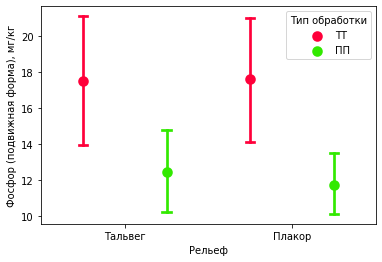

In [69]:
plot = sns.pointplot(
    data = агрохимия_для_статьи,
    x = 'Рельеф',
    y = "Фосфор (подвижная форма), мг/кг", 
    hue = 'Тип обработки',
    groupby = 'Тип обработки', 
    palette = "prism_r",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05)

#capsize = .05

<AxesSubplot:xlabel='Рельеф', ylabel='Фосфор (подвижная форма), мг/кг'>

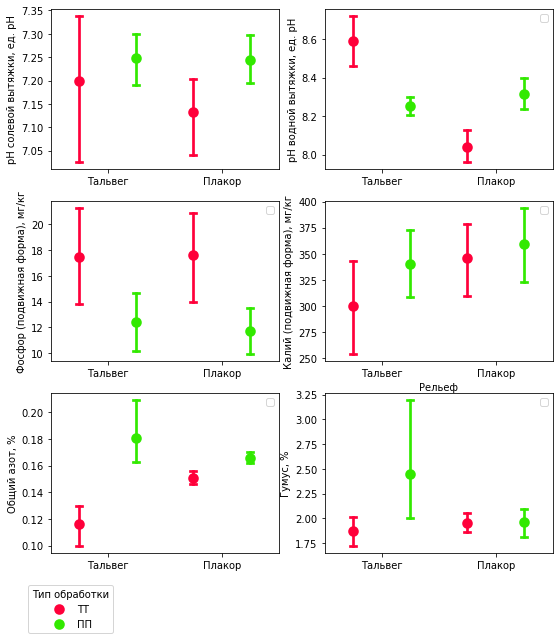

In [8]:
fig, ax  = plt.subplots(3,2, figsize = (9,10))
sns.pointplot(
    data = агрохимия_для_статьи,
    x = 'Рельеф',
    y = "рН солевой вытяжки, ед. рН", 
    hue = 'Тип обработки', 
    palette = "prism_r",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05,
    ax = ax[0,0])
ax[0,0].set_xlabel('')
ax[0,0].legend(bbox_to_anchor=(-0.1, -2.6), loc=2, borderaxespad=0., title = 'Тип обработки')

sns.pointplot(
    data = агрохимия_для_статьи,
    x = 'Рельеф',
    y = "рН водной вытяжки, ед. рН", 
    hue = 'Тип обработки', 
    palette = "prism_r",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05,
    ax = ax[0,1])
ax[0,1].set_xlabel('')
ax[0,1].legend([],[])

sns.pointplot(
    data = агрохимия_для_статьи,
    x = 'Рельеф',
    y = "Фосфор (подвижная форма), мг/кг", 
    hue = 'Тип обработки', 
    palette = "prism_r",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05,
    ax = ax[1,0])
ax[1,0].set_xlabel('')
ax[1,0].legend([],[])

sns.pointplot(
    data = агрохимия_для_статьи,
    x = 'Рельеф',
    y = "Калий (подвижная форма), млн-1", 
    hue = 'Тип обработки', 
    palette = "prism_r",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05,
    ax = ax[1,1])
ax[1,1].set_ylabel('Калий (подвижная форма), мг/кг')

ax[1,1].legend([],[])

sns.pointplot(
    data = агрохимия_для_статьи,
    x = 'Рельеф',
    y = "Общий азот, %", 
    hue = 'Тип обработки', 
    palette = "prism_r",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05,
    ax = ax[2,0])
ax[2,0].set_xlabel('')
ax[2,0].legend([],[])

sns.pointplot(
    data = агрохимия_для_статьи,
    x = 'Рельеф',
    y = 'Гумус, %', 
    hue = 'Тип обработки', 
    palette = "prism_r",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05,
    ax = ax[2,1])
ax[2,1].set_xlabel('')
ax[2,1].legend([],[])





In [9]:
aov_for_nominal(агрохимия_для_статьи, 'рН солевой вытяжки, ед. рН')

,p-value
Типобработки,0.145
Рельеф,0.508
Типобработки:Рельеф,0.560
Residual,NaN


In [10]:
aov_for_nominal(агрохимия_для_статьи, 'рН водной вытяжки, ед. рН')

,p-value
Типобработки,0.116
Рельеф,0.000
Типобработки:Рельеф,0.000
Residual,NaN


In [11]:
aov_for_nominal(агрохимия_для_статьи, 'Фосфор (подвижная форма), мг/кг')

,p-value
Типобработки,0.001
Рельеф,0.839
Типобработки:Рельеф,0.790
Residual,NaN


In [12]:
aov_for_nominal(агрохимия_для_статьи, 'Калий (подвижная форма), млн-1')

,p-value
Типобработки,0.192
Рельеф,0.118
Типобработки:Рельеф,0.492
Residual,NaN


In [13]:
aov_for_nominal(агрохимия_для_статьи, 'Общий азот, %')

,p-value
Типобработки,0.000
Рельеф,0.218
Типобработки:Рельеф,0.003
Residual,NaN


In [14]:
aov_for_nominal(агрохимия_для_статьи, 'Гумус, %')

,p-value
Типобработки,0.116
Рельеф,0.287
Типобработки:Рельеф,0.129
Residual,NaN


# ФИЗИКА

In [15]:
def aov_for_nominal(df, agrochem_property):
    """
    input - dataframe by agrochemical_proprerty
    output - resul of MANOVA
    """
    dispers = df.copy()
    agrochem_property_ = re.sub(r'[\(),.%№ /-]', '' , agrochem_property)
    dispers.columns = dispers.columns.str.replace(r'[\(),.%№ /-]', '' )
    reg = ols('{} ~ Типобработки'.format(agrochem_property_) ,  data=dispers).fit()
    aov = sm.stats.anova_lm(reg)
    aov = aov[["PR(>F)"]]
    aov.columns = ['p-value']
    aov = aov.iloc[:4,:]
    aov['p-value'] = round(aov['p-value'] , 3)
    return aov

In [16]:
агрофизика_для_статьи = pd.read_csv("ready_data/агрофизика.csv")
fiz_params = ["Тип обработки",
             "Содержание 0,25–10 мм, %",
             "Содержание 0.25–10 мм(водоустойчивые), % ",
             "СВД, мм",
             "СВД водоустойчивые >10, мм",
             "СВД водоустойчивые 10-7, мм",
             "СВД водоустойчивые 7-5, мм",
             "СВД водоустойчивые 5-3, мм"    ]

агрофизика_для_статьи = агрофизика_для_статьи[fiz_params]

SVD_by_agregates = агрофизика_для_статьи[[
    'Тип обработки',
    'СВД водоустойчивые >10, мм',
    'СВД водоустойчивые 10-7, мм',
    'СВД водоустойчивые 7-5, мм' ,
    'СВД водоустойчивые 5-3, мм']]
SVD_by_agregates = SVD_by_agregates.melt(
    id_vars = 'Тип обработки' ,
    value_vars = [
        'СВД водоустойчивые >10, мм',
        'СВД водоустойчивые 10-7, мм',
        'СВД водоустойчивые 7-5, мм' ,
        'СВД водоустойчивые 5-3, мм']
    , var_name = 'Агрегаты, мм'
    , value_name='Размер, мм')

SVD_by_agregates['Агрегаты, мм'] = SVD_by_agregates['Агрегаты, мм'].str.split(' ', expand=True)[2].str.replace(',','')



In [17]:
агрофизика_для_статьи.groupby(['Тип обработки']).count()

,"Содержание 0,25–10 мм, %","Содержание 0.25–10 мм(водоустойчивые), %","СВД, мм","СВД водоустойчивые >10, мм","СВД водоустойчивые 10-7, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые 5-3, мм"
Тип обработки,,,,,,,
ПП,9,9,9,9,9,9,9
ТТ,6,6,6,6,6,6,6


In [18]:
агрофизика_для_статьи.groupby(['Тип обработки']).mean()

,"Содержание 0,25–10 мм, %","Содержание 0.25–10 мм(водоустойчивые), %","СВД, мм","СВД водоустойчивые >10, мм","СВД водоустойчивые 10-7, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые 5-3, мм"
Тип обработки,,,,,,,
ПП,0.398852,0.661681,9.106176,5.24834,3.521854,2.071514,1.298840
ТТ,0.452250,0.637208,8.063008,2.75850,1.744740,1.229729,0.906875


In [19]:
агрофизика_для_статьи.groupby(['Тип обработки']).std()

,"Содержание 0,25–10 мм, %","Содержание 0.25–10 мм(водоустойчивые), %","СВД, мм","СВД водоустойчивые >10, мм","СВД водоустойчивые 10-7, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые 5-3, мм"
Тип обработки,,,,,,,
ПП,0.054045,0.081881,0.43421,1.108882,0.862926,0.306476,0.288405
ТТ,0.074064,0.040759,0.90335,0.978510,0.375665,0.223905,0.057123


In [20]:
агрофизика_для_статьи.groupby(['Тип обработки']).std() / агрофизика_для_статьи.groupby(['Тип обработки']).mean() * 100

,"Содержание 0,25–10 мм, %","Содержание 0.25–10 мм(водоустойчивые), %","СВД, мм","СВД водоустойчивые >10, мм","СВД водоустойчивые 10-7, мм","СВД водоустойчивые 7-5, мм","СВД водоустойчивые 5-3, мм"
Тип обработки,,,,,,,
ПП,13.550116,12.374654,4.768305,21.128246,24.502042,14.794791,22.204824
ТТ,16.376768,6.396511,11.203631,35.472524,21.531312,18.207677,6.298842


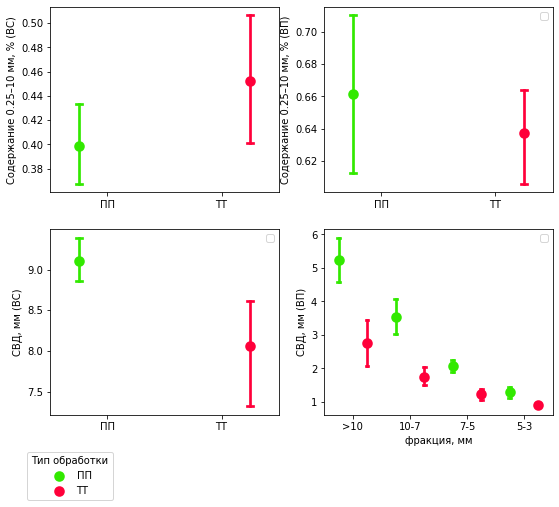

In [21]:
fig, ax  = plt.subplots(2,2, figsize = (9,7.5))
sns.pointplot(
    data = агрофизика_для_статьи,
    x = 'Тип обработки',
    y = "Содержание 0,25–10 мм, %", 
    hue = 'Тип обработки', 
    palette = "prism",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05,
    ax = ax[0,0])
ax[0,0].set_xlabel('')
ax[0,0].set_ylabel("Содержание 0.25–10 мм, % (ВC)")
ax[0,0].legend(bbox_to_anchor=(-0.1, -1.4), loc=2, borderaxespad=0., title = 'Тип обработки')

sns.pointplot(
    data = агрофизика_для_статьи,
    x = 'Тип обработки',
    y = "Содержание 0.25–10 мм(водоустойчивые), % ", 
    hue = 'Тип обработки', 
    palette = "prism",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05,
    ax = ax[0,1])
ax[0,1].set_xlabel('')
ax[0,1].set_ylabel("Содержание 0.25–10 мм, % (ВП)")
ax[0,1].legend([],[])

sns.pointplot(
    data = агрофизика_для_статьи,
    x = 'Тип обработки',
    y = "СВД, мм", 
    hue = 'Тип обработки', 
    palette = "prism",
    scale = 1.2,
    ci = 95,
    dodge= 0.5,
    join = False,
    capsize = .05,
    ax = ax[1,0])
ax[1,0].set_xlabel('')
ax[1,0].set_ylabel("СВД, мм (ВC)")
ax[1,0].legend([],[])

sns.pointplot(
    data = SVD_by_agregates,
    x = "Агрегаты, мм",
    y = "Размер, мм",
    hue = "Тип обработки",
    palette = "prism",
    scale = 1.2,
    dodge = 0.5,
    ci = 95,
    join = False,
    capsize = .05,
    ax = ax[1,1])
ax[1,1].set_xlabel('фракция, мм')
ax[1,1].set_ylabel("СВД, мм (ВП)")
ax[1,1].legend([],[])


In [22]:
def aov(column):
    F = ANOVA(агрофизика_для_статьи[column][агрофизика_для_статьи['Тип обработки'] == 'ПП'],
    агрофизика_для_статьи[column][агрофизика_для_статьи['Тип обработки'] != 'ПП'] )[1]
    return "p-value - {}".format(round(F,3))

In [23]:
aov("Содержание 0,25–10 мм, %")

'p-value - 0.129'

In [24]:
aov("Содержание 0.25–10 мм(водоустойчивые), % ")

'p-value - 0.513'

In [25]:
aov("СВД, мм")

'p-value - 0.01'

In [26]:
aov("СВД водоустойчивые >10, мм")

'p-value - 0.001'

In [27]:
aov("СВД водоустойчивые 10-7, мм")

'p-value - 0.0'

In [28]:
aov("СВД водоустойчивые 7-5, мм")

'p-value - 0.0'

In [29]:
aov("СВД водоустойчивые 5-3, мм")

'p-value - 0.006'